# Use Python <3.10

This package heavily utilizes the pyMuellerMat package that makes Mueller matrices from "system dictionaries" detailing the instrument configuration. If you want to familiarize yourself with the package beforehand, visit https://github.com/maxwellmb/pyMuellerMat/

In [1]:
import sys
import numpy as np
from pathlib import Path
parent_dir = Path.cwd().parent
sys.path.append(str(parent_dir))
from instruments import *
from physical_models import *

# Step 1: Write FITS Info to CSV

In [2]:
# Get paths to both processed and raw data 
# Make sure these directories have cubes with corresonding numbers
cube_dir = '/Users/thomasmcintosh/Desktop/CHARIS-REU/Cubes_3/cubes'
raw_dir = '/Users/thomasmcintosh/Desktop/CHARIS-REU/Raw_3/internal-cal'

# Write all bins to csvs
for bin in range(0,22):
   csv_filepath = f'/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin{bin}.csv'
   write_fits_info_to_csv(cube_dir, raw_dir, csv_filepath,bin)



CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin0.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin1.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin2.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin3.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin4.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin5.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin6.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin7.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cu

# Step 2 (Optional): Split Up Your Data

In [3]:
# This is specific to what I'm fitting
# I'm going to split the csvs in half because one half has the pickoff in and the other half has it out

# sort csvs into with and without pickoff
def split_csv(file_path):
    file_path = Path(file_path)
    if not file_path.exists() or file_path.suffix != ".csv":
        raise ValueError("Please provide a valid .csv file.")

    # Read original CSV
    df = pd.read_csv(file_path)

    # Split into two DataFrames
    df_no_pickoff = df.iloc[72:].reset_index(drop=True)
    df_with_pickoff = df.iloc[:72].reset_index(drop=True)

    # Create new file names
    stem = file_path.stem  # without .csv
    suffix = file_path.suffix
    parent = file_path.parent
    pickoff_folder = Path('/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_pickoff')
    nopickoff_folder = Path('/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff')
    no_pickoff_path = nopickoff_folder / f"{stem}_no_pickoff{suffix}"
    with_pickoff_path = pickoff_folder / f"{stem}_with_pickoff{suffix}"

    # Save the new CSVs
    df_no_pickoff.to_csv(no_pickoff_path, index=False)
    df_with_pickoff.to_csv(with_pickoff_path, index=False)

    print(f"Saved: {no_pickoff_path}")
    print(f"Saved: {with_pickoff_path}")

# split all csvs
for bin in range(0,22):
     csv_path = f'/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin{bin}.csv'
     split_csv(csv_path)

Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff/charis_cube_info_bin0_no_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_pickoff/charis_cube_info_bin0_with_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff/charis_cube_info_bin1_no_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_pickoff/charis_cube_info_bin1_with_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff/charis_cube_info_bin2_no_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_pickoff/charis_cube_info_bin2_with_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff/charis_cube_info_bin3_no_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_pickoff/charis_cube_info_bin3_with_pickoff.csv
Saved: /Users/thomasmcintosh/Des

# Step 3 (Optional): Plot Your Data With the Original Model 

In [2]:
# Define a csv filepath that we just created from whatever wavelength bin you want to visualize
# I have bin zero here, but I would recommend using a bin more in the middle to get a good idea,
# bin zero can be finicky
filepath = Path('/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff/charis_cube_info_bin15_no_pickoff.csv')

# Read in data

interleaved_values, interleaved_stds, configuration_list = read_csv(filepath)
print("Interleaved Values")
print("Length: ", len(interleaved_values))
print(interleaved_values[0 : 10])
print("Interleaved Stds")
print("Length: ", len(interleaved_stds))
print(interleaved_stds[0 : 10])
print("Configuration List")
print("Length: ", len(configuration_list))
print(configuration_list[0 : 10])
print(interleaved_stds[0])

Interleaved Values
Length:  144
[-5.22213279e-01  4.02450338e+08 -3.91877275e-01  4.00912593e+08
 -2.46134292e-02  3.98605969e+08  3.77378452e-01  3.98571117e+08
  5.86235703e-01  4.00370202e+08]
Interleaved Stds
Length:  144
[4.25107378e-05 2.00611649e+04 4.59484896e-05 2.00228018e+04
 5.00721811e-05 1.99651188e+04 4.63858804e-05 1.99642460e+04
 4.04882954e-05 2.00092529e+04]
Configuration List
Length:  72
[{'hwp': {'theta': 0.0}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 11.25}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 22.5}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 33.75}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 45.0}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 56.25}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 67.5}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 78.75}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 90.0}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 0.0}, 'image_rotator': {'th

In [7]:

# Define wavelength bins for CHARIS

wavelength_bins = np.array([1159.5614, 1199.6971, 1241.2219, 1284.184 , 1328.6331, 1374.6208,
1422.2002, 1471.4264, 1522.3565, 1575.0495, 1629.5663, 1685.9701,
1744.3261, 1804.7021, 1867.1678, 1931.7956, 1998.6603, 2067.8395,
2139.4131, 2213.4641, 2290.0781, 2369.3441])

# Loading in past fits from Joost t Hart 2021

offset_imr = -0.0118 # derotator offset
offset_hwp = -0.002 # HWP offset
offset_cal = -0.035 # calibration polarizer offset
imr_theta = 0
hwp_theta = 0

# Define instrument configuration as system dictionary
# Wollaston beam, imr theta/phi, and hwp theta/phi will all be updated within functions, so don't worry about their values here

system_dict = {
        "components" : {
            "wollaston" : {
            "type" : "wollaston_prism_function",
            "properties" : {"beam": 'o'}, 
            "tag": "internal",
            },
            "image_rotator" : {
                "type" : "general_retarder_function",
                "properties" : {"phi": 0, "theta": imr_theta, "delta_theta": offset_imr},
                "tag": "internal",
            },
            "hwp" : {
                "type" : "general_retarder_function",
                "properties" : {"phi": 0, "theta": hwp_theta, "delta_theta": offset_hwp},
                "tag": "internal",
            },
            "lp" : {  # calibration polarizer for internal calibration source
                "type": "general_linear_polarizer_function_with_theta",
                "properties": {"delta_theta": offset_cal },
                "tag": "internal",
            }}
    }

# Converting system dictionary into system Mueller Matrix object

system_mm = generate_system_mueller_matrix(system_dict)
print(system_mm.evaluate())



[[ 0.49999981  0.49999944 -0.00061086  0.        ]
 [ 0.49999981  0.49999944 -0.00061086  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]


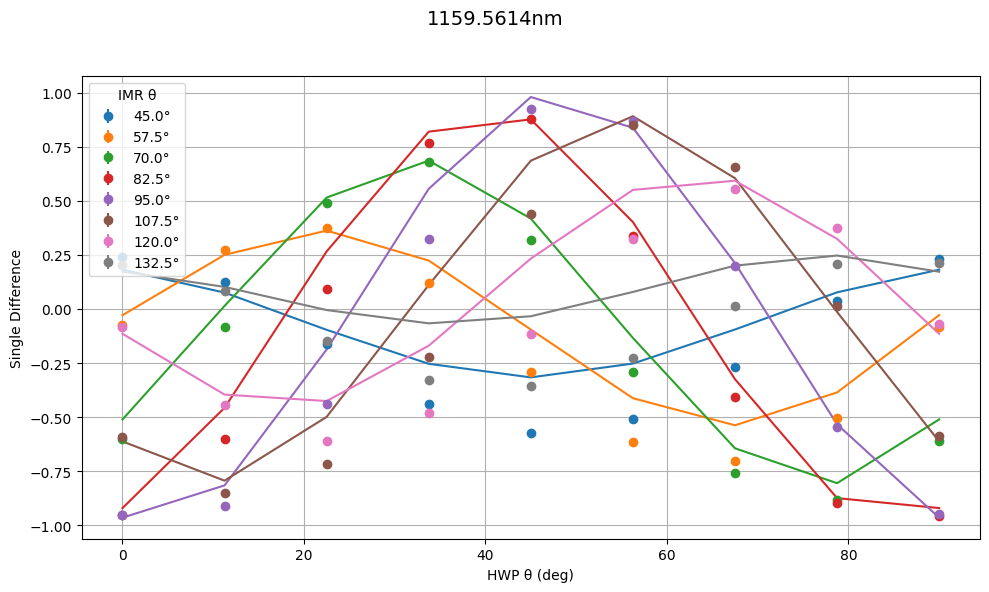

Residuals range: -0.34850937187899333 0.05915823439866466


In [8]:

# Get our model retardances from Joost t Hart physical models

p = [HWP_retardance(wavelength_bins)[0], IMR_retardance(wavelength_bins)[0]]


# Gefine what is in the p list

system_parameters = [['hwp', 'phi'], ['image_rotator', 'phi']]

# Generate our modeled left and right beam intensities

LR_intensities = model(p, system_parameters, system_mm, configuration_list)

# Process these into interleaved single norm differences and sums

diffs_sums = process_model(LR_intensities, 'CHARIS')

# Plot the modeled and observed values

plot_data_and_model(interleaved_values, interleaved_stds, diffs_sums,configuration_list, wavelength= wavelength_bins[0], mode='CHARIS')

# Print residuals (will be useful later to see if your fit improved at a quick glance)
residuals = interleaved_values[::2] - diffs_sums[::2]
print("Residuals range:", residuals.min(), residuals.max())


# Step 4: Fit New Model

I made a function that does everything quickly but is also tailored to the parameters I am fitting. My function updates the model, puts the pyMuellerMat compatible system dictionary in a JSON file, and optionally saves a plot of the model vs data to a specified path.
If you want to use it for different parameters than the ones detailed in the docstring, 
you'll have to update the function a bit (which shouldn't take too long). 

NOTE: I am only fitting for the retardances and lp diattenuation here, not the offsets, to preserve correct errors. Previously, I did this same fitting procedure including the offsets, and their values were extremeley consistent across wavelength bins (std ~10^-13). I fixed these averages for the offset angles. For unknown reasons, when I did that first fit the errors were nonsensical for the offsets. 

     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [-1.167e+03  4.515e+02 ... -1.851e+03 -1.145e+03]
           x: [ 9.474e-01  3.032e+00  9.796e-01]
        cost: 92828086.61542429
         jac: [[ 1.871e+04 -1.902e+01 -1.373e+04]
               [ 1.276e+04 -6.400e+03 -8.245e+03]
               ...
               [ 1.249e+04  6.655e+03 -9.073e+03]
               [ 1.881e+04 -1.929e+01 -1.399e+04]]
        grad: [-4.761e+08 -1.349e+00  3.816e-01]
  optimality: 0.37835362801682726
 active_mask: [1 0 0]
        nfev: 7
        njev: 7
     message: Both `ftol` and `xtol` termination conditions are satisfied.
     success: True
      status: 4
         fun: [-1.167e+03  4.515e+02 ... -1.851e+03 -1.145e+03]
           x: [ 9.474e-01  3.032e+00  9.796e-01]
        cost: 92828086.61542422
         jac: [[ 1.871e+04 -1.902e+01 -1.373e+04]
               [ 1.276e+04 -6.400e+03 -8.245e+03]
               ...
               [ 1.249e+04  6.65

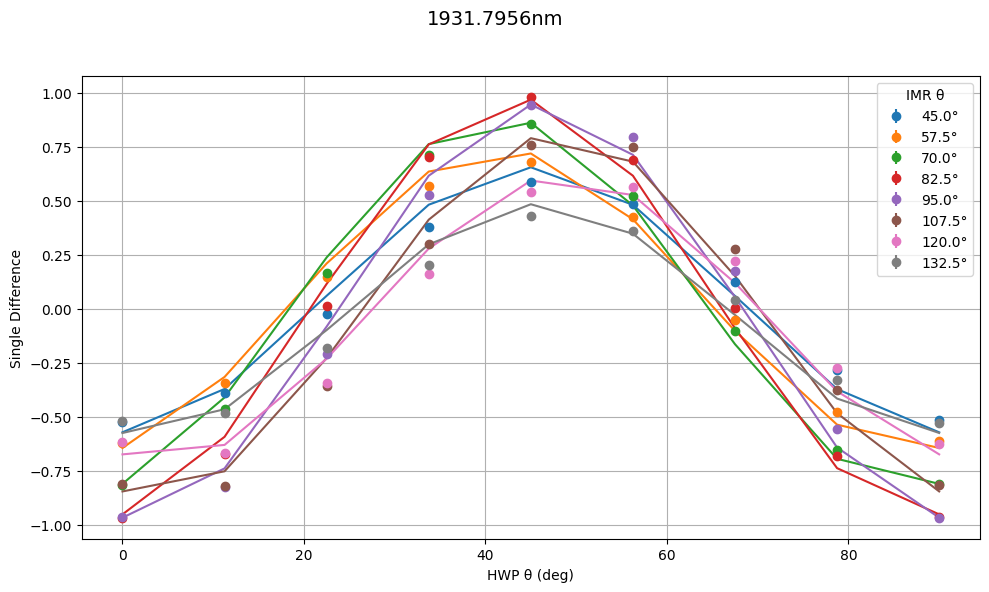

Updated Mueller Matrix:
[[ 0.21251287  0.19633058 -0.00556841  0.08114811]
 [-0.21251287 -0.19633058  0.00556841 -0.08114811]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.13053718660894698 0.12372521724415236
Error: [0.02086059 0.02075579 0.00781065]


array([0.02086059, 0.02075579, 0.00781065])

In [3]:
# Test fitting with the wavelength bin we plotted earlier

fit_CHARIS_Mueller_matrix_by_bin(filepath, 15, 
    Path('/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/system_dicts_no_pickoff_cal/bin15.json'),
    plot_path=Path('/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/model_plots_no_pickoff_cal/bin15.png'),)



Looks like our model improved! Note that the Joost't Hart paper used a more elaborate physical model, which I will incorporate later. These fits are a good starting point for more detailed models. Now we can fit for all bins and collect the errors.

     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 3.036e+02  2.295e+02 ...  4.513e+02  3.611e+02]
           x: [ 4.364e+00  3.029e+00  1.000e+00]
        cost: 6375404.431752605
         jac: [[-2.836e+03  2.881e+00  1.028e+03]
               [-2.016e+03  1.046e+03  5.941e+02]
               ...
               [-2.115e+03 -1.069e+03  1.072e+03]
               [-2.822e+03  2.838e+00  9.998e+02]]
        grad: [ 5.268e-01 -1.798e+00 -1.578e+07]
  optimality: 0.49147881710438907
 active_mask: [0 0 1]
        nfev: 7
        njev: 7
     message: Both `ftol` and `xtol` termination conditions are satisfied.
     success: True
      status: 4
         fun: [ 3.036e+02  2.295e+02 ...  4.513e+02  3.611e+02]
           x: [ 4.364e+00  3.029e+00  1.000e+00]
        cost: 6375404.431752597
         jac: [[-2.836e+03  2.881e+00  1.028e+03]
               [-2.016e+03  1.046e+03  5.941e+02]
               ...
               [-2.115e+03 -1.06

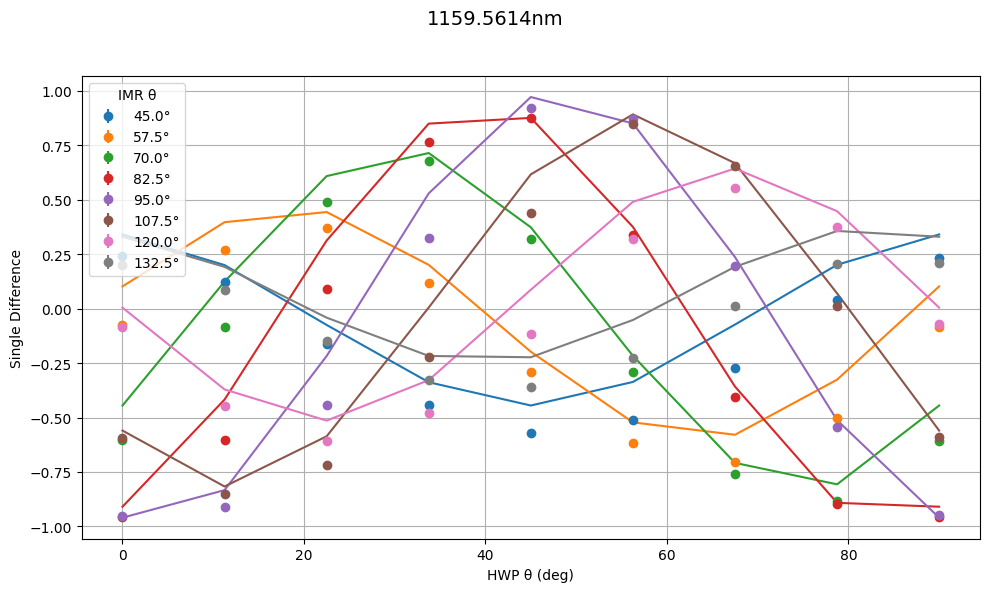

Updated Mueller Matrix:
[[ 6.65251099e-01  6.65250697e-01 -7.31479987e-04 -6.83466510e-09]
 [-6.65251099e-01 -6.65250697e-01  7.31479987e-04  6.83466510e-09]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]
Residuals range: -0.2271590833428972 0.017908749292382065
Error: [0.03064139 0.03149601 0.01563245]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 6.084e+01 -9.766e+01 ...  1.507e+02 -1.866e+01]
           x: [ 4.084e+00  3.033e+00  9.969e-01]
        cost: 2449065.4939884664
         jac: [[-3.001e+03  3.051e+00  2.187e+03]
               [-1.994e+03  1.000e+03  1.281e+03]
               ...
               [-2.085e+03 -1.086e+03  1.896e+03]
               [-3.008e+03  3.013e+00  2.163e+03]]
        grad: [ 3.380e-02 -5.063e-02 -9.806e+00]
  optimality: 0.03012744544680219
 active_mask: [0 0 0]
        nfev: 8
        njev: 8
     message

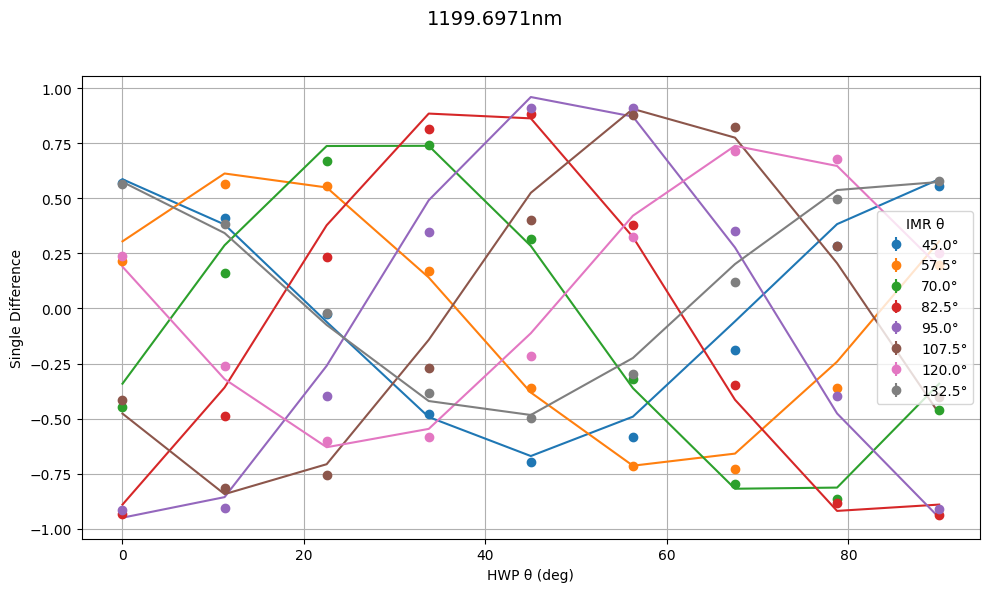

Updated Mueller Matrix:
[[ 0.78689089  0.78624808  0.00795972 -0.03078745]
 [-0.78689089 -0.78624808 -0.00795972  0.03078745]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.14453874249635945 0.08123931305651794
Error: [0.02136909 0.02114966 0.01076674]
     message: Both `ftol` and `xtol` termination conditions are satisfied.
     success: True
      status: 4
         fun: [ 1.422e+02 -5.602e+01 ...  2.593e+02  3.277e+00]
           x: [ 3.871e+00  3.044e+00  1.000e+00]
        cost: 4358397.3745461125
         jac: [[-3.368e+03  3.427e+00  3.764e+03]
               [-2.056e+03  1.004e+03  2.066e+03]
               ...
               [-2.109e+03 -1.127e+03  2.847e+03]
               [-3.426e+03  3.422e+00  3.789e+03]]
        grad: [ 3.167e-02  4.515e-02 -2.188e+06]
  optimality: 0.016335751064522556
 active_mask: [0 0 1]
        nfev: 10
        njev: 10
     message: Both `ftol` and `xtol` termination condit

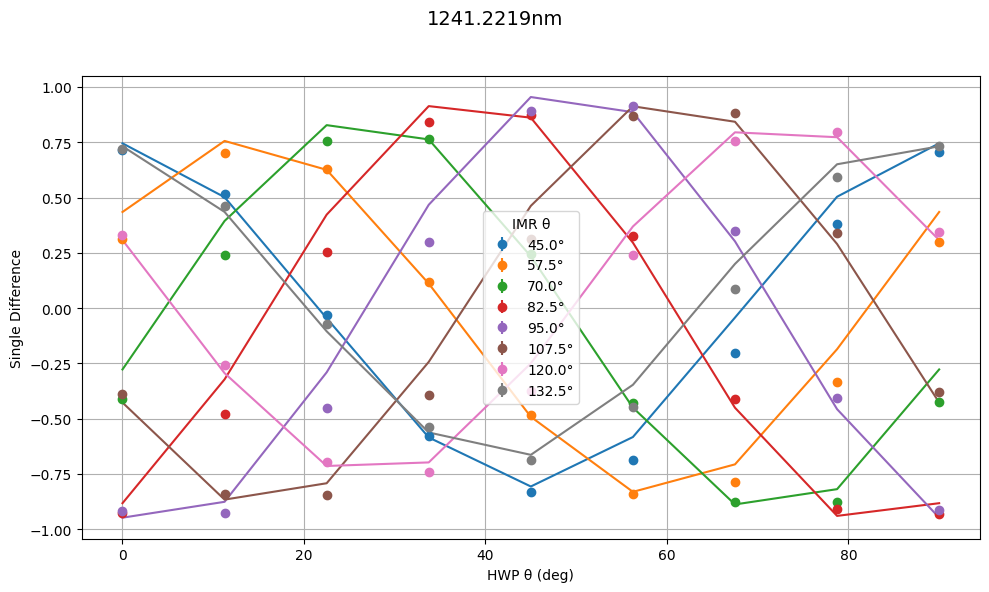

Updated Mueller Matrix:
[[ 8.65876830e-01  8.65876307e-01 -9.52079494e-04 -4.81416825e-09]
 [-8.65876830e-01 -8.65876307e-01  9.52079494e-04  4.81416825e-09]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]
Residuals range: -0.16904934967972224 0.04937685850611562
Error: [0.02822274 0.02643245 0.01197915]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 1.406e+02 -1.478e+02 ...  3.487e+02 -5.259e+01]
           x: [ 3.630e+00  3.078e+00  9.956e-01]
        cost: 6060947.777955726
         jac: [[-3.596e+03  3.669e+00  6.798e+03]
               [-1.793e+03  8.701e+02  3.123e+03]
               ...
               [-1.786e+03 -9.666e+02  3.951e+03]
               [-3.711e+03  3.716e+00  6.954e+03]]
        grad: [-3.885e-02 -5.700e-01  2.095e-01]
  optimality: 0.10814483971722622
 active_mask: [0 0 0]
        nfev: 8
        njev: 8
     message:

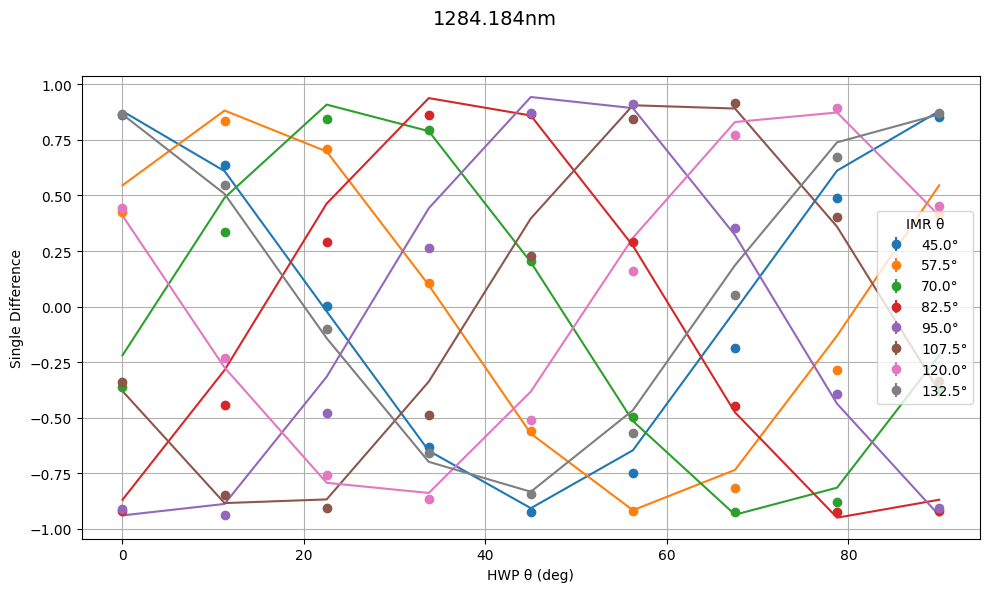

Updated Mueller Matrix:
[[ 0.93234473  0.93206395  0.00810532 -0.02139609]
 [-0.93234473 -0.93206395 -0.00810532  0.02139609]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.1792229347310465 0.04677153024911146
Error: [0.03953454 0.03393117 0.01263771]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 6.127e+01 -2.982e+02 ...  4.346e+02 -1.377e+02]
           x: [ 3.443e+00  3.197e+00  9.931e-01]
        cost: 7580691.742705179
         jac: [[-4.068e+03  4.156e+00  1.319e+04]
               [-1.240e+03  7.949e+02  4.487e+03]
               ...
               [-1.588e+03 -6.975e+02  5.050e+03]
               [-4.029e+03  4.263e+00  1.295e+04]]
        grad: [-1.740e+01  1.070e+02 -7.684e+00]
  optimality: 56.85511524458499
 active_mask: [0 0 0]
        nfev: 8
        njev: 8
     message: `ftol` termination condition is satisfied.
     success: True
    

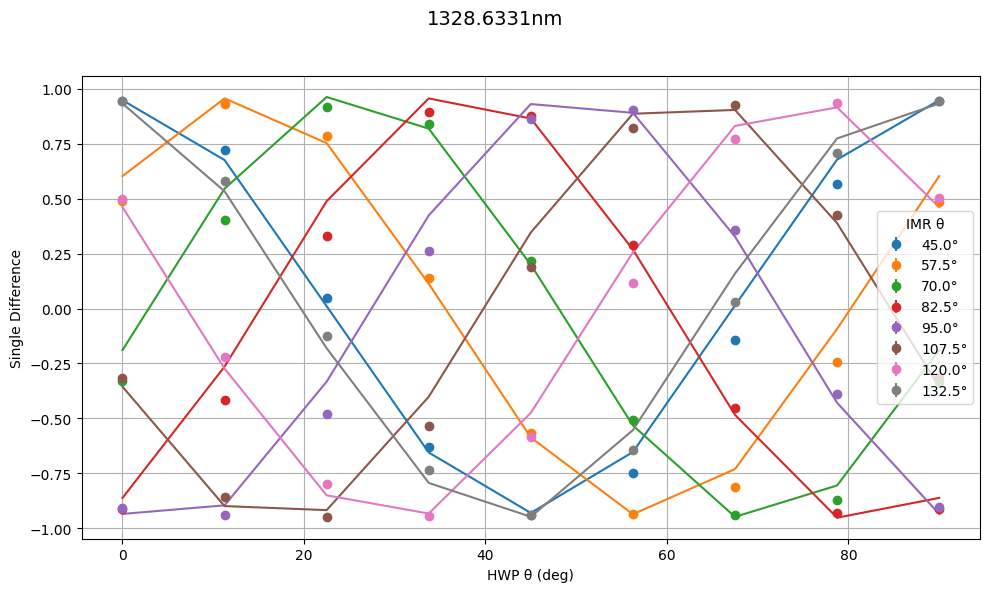

Updated Mueller Matrix:
[[ 0.96666524  0.96646658  0.00802329 -0.01787886]
 [-0.96666524 -0.96646658 -0.00802329  0.01787886]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.16277541428705544 0.060691044730255106
Error: [0.05496288 0.0441846  0.01187148]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 3.677e+02 -3.526e+02 ...  1.179e+03  4.446e+02]
           x: [ 2.707e+00  2.964e+00  9.968e-01]
        cost: 33652389.55113912
         jac: [[ 8.981e+03 -9.047e+00  1.940e+04]
               [ 3.250e+03 -2.502e+03  9.217e+03]
               ...
               [ 4.885e+03  1.848e+03  9.226e+03]
               [ 8.306e+03 -8.993e+00  1.779e+04]]
        grad: [ 6.881e+06  3.755e-01  1.002e+00]
  optimality: 0.1150765894153692
 active_mask: [-1  0  0]
        nfev: 10
        njev: 10
     message: Both `ftol` and `xtol` termination conditions are satisfie

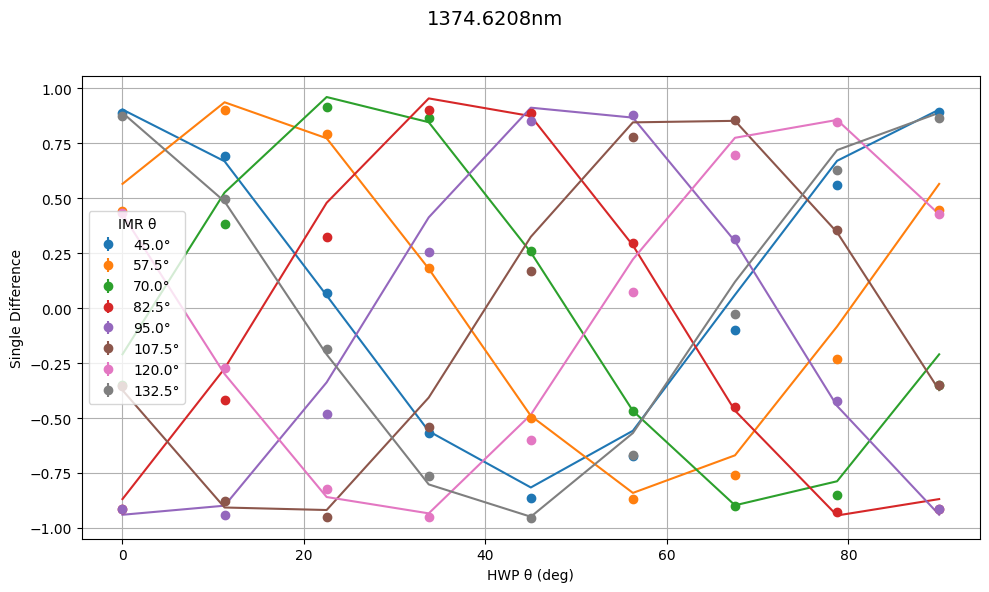

Updated Mueller Matrix:
[[ 0.94468051  0.9445126   0.0025678   0.01762441]
 [-0.94468051 -0.9445126  -0.0025678  -0.01762441]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.16101124891965568 0.03814420094173854
Error: [0.04052648 0.03499494 0.01105644]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 2.850e+02 -5.038e+01 ...  8.334e+02  4.854e+02]
           x: [ 2.440e+00  2.941e+00  9.995e-01]
        cost: 16059973.767795227
         jac: [[ 6.503e+03 -6.520e+00  7.710e+03]
               [ 3.395e+03 -2.254e+03  5.031e+03]
               ...
               [ 4.354e+03  1.808e+03  4.670e+03]
               [ 6.156e+03 -6.497e+00  7.224e+03]]
        grad: [-9.862e-01  3.646e+01 -4.946e+01]
  optimality: 10.47488390544754
 active_mask: [0 0 0]
        nfev: 10
        njev: 10
     message: `ftol` termination condition is satisfied.
     success: True


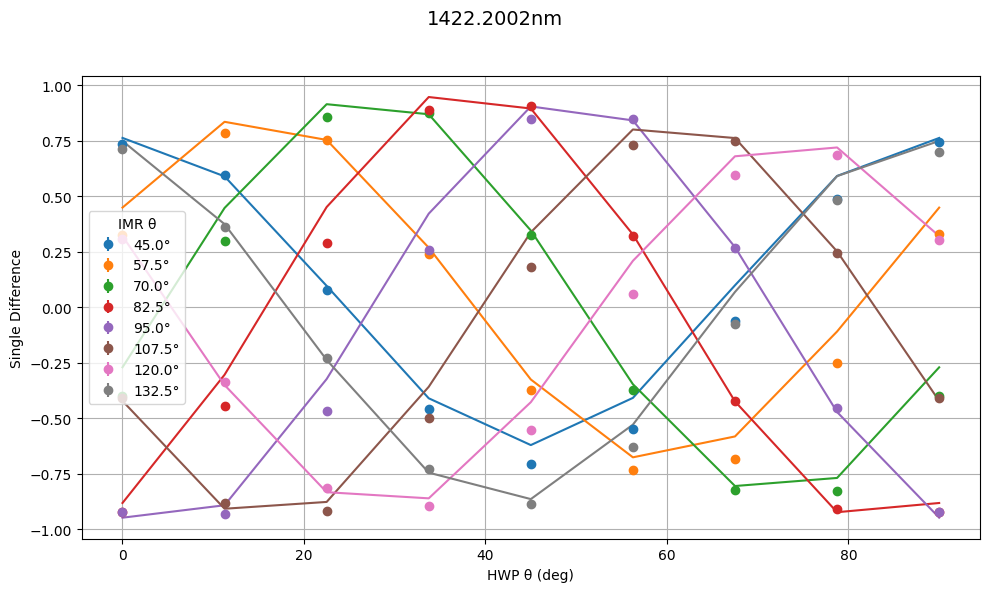

Updated Mueller Matrix:
[[ 8.75087579e-01  8.75020099e-01 -5.79919369e-04  1.08517090e-02]
 [-8.75087579e-01 -8.75020099e-01  5.79919369e-04 -1.08517090e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]
Residuals range: -0.1640947196382112 0.025050772302282587
Error: [0.02871523 0.02664489 0.01163615]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 2.267e+02  5.178e+01 ...  6.290e+02  4.662e+02]
           x: [ 2.171e+00  2.938e+00  9.978e-01]
        cost: 10001952.674970068
         jac: [[ 6.565e+03 -6.578e+00  4.504e+03]
               [ 4.078e+03 -2.461e+03  3.504e+03]
               ...
               [ 4.848e+03  2.157e+03  3.054e+03]
               [ 6.357e+03 -6.613e+00  4.301e+03]]
        grad: [ 5.471e-01  4.234e+00 -5.942e-01]
  optimality: 1.2198480202928974
 active_mask: [0 0 0]
        nfev: 8
        njev: 8
     message:

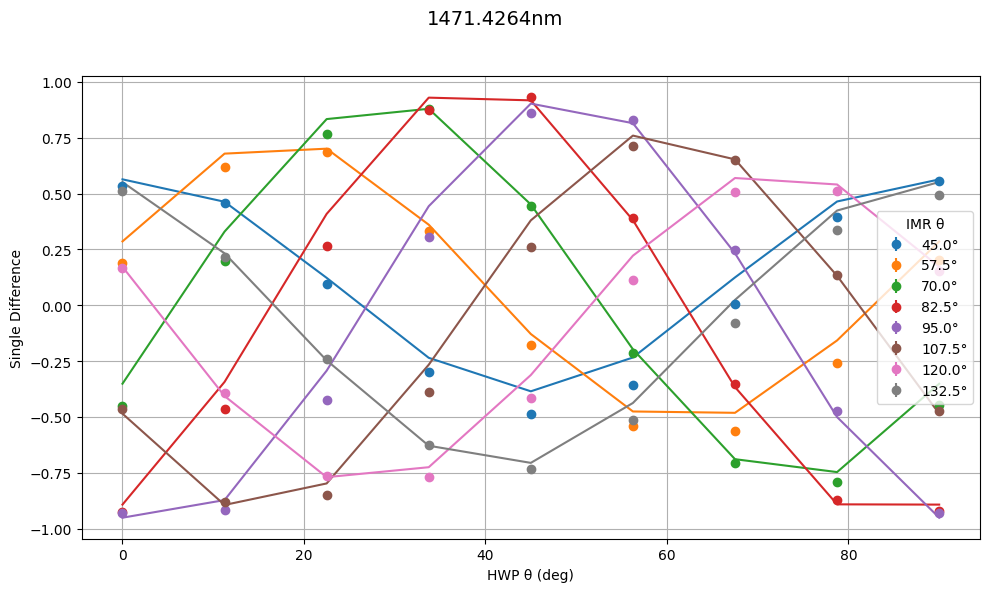

Updated Mueller Matrix:
[[ 0.77576252  0.77525965 -0.00192411  0.02786146]
 [-0.77576252 -0.77525965  0.00192411 -0.02786146]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.14317679927379245 0.026978667204882345
Error: [0.0191851  0.01914052 0.00959019]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 2.408e+02  2.014e+02 ...  5.177e+02  4.876e+02]
           x: [ 1.926e+00  2.937e+00  9.965e-01]
        cost: 8108145.675090161
         jac: [[ 6.349e+03 -6.359e+00  2.367e+03]
               [ 4.269e+03 -2.427e+03  2.148e+03]
               ...
               [ 4.892e+03  2.280e+03  1.644e+03]
               [ 6.248e+03 -6.446e+00  2.277e+03]]
        grad: [ 9.581e-01  3.329e+00 -2.815e-01]
  optimality: 0.95938776376731
 active_mask: [0 0 0]
        nfev: 7
        njev: 7
     message: Both `ftol` and `xtol` termination conditions are satisfied.
    

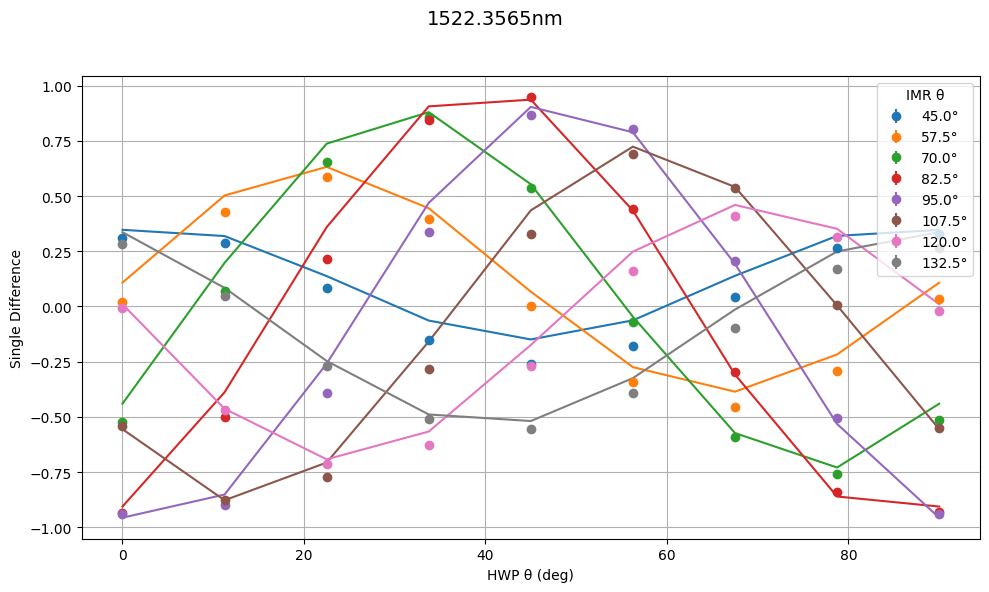

Updated Mueller Matrix:
[[ 0.66830221  0.66713651 -0.00385809  0.03926618]
 [-0.66830221 -0.66713651  0.00385809 -0.03926618]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.1433636592253651 0.0254420428461829
Error: [0.01639103 0.01700068 0.00892655]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 2.431e+02  3.237e+02 ...  4.354e+02  5.027e+02]
           x: [ 1.716e+00  2.939e+00  9.972e-01]
        cost: 9100290.680686727
         jac: [[ 7.167e+03 -7.182e+00  1.052e+03]
               [ 4.991e+03 -2.719e+03  1.294e+03]
               ...
               [ 5.557e+03  2.685e+03  6.579e+02]
               [ 7.133e+03 -7.324e+00  9.911e+02]]
        grad: [-1.861e+00 -7.030e+00 -2.702e-01]
  optimality: 2.097750405947641
 active_mask: [0 0 0]
        nfev: 8
        njev: 8
     message: Both `ftol` and `xtol` termination conditions are satisfied.
     s

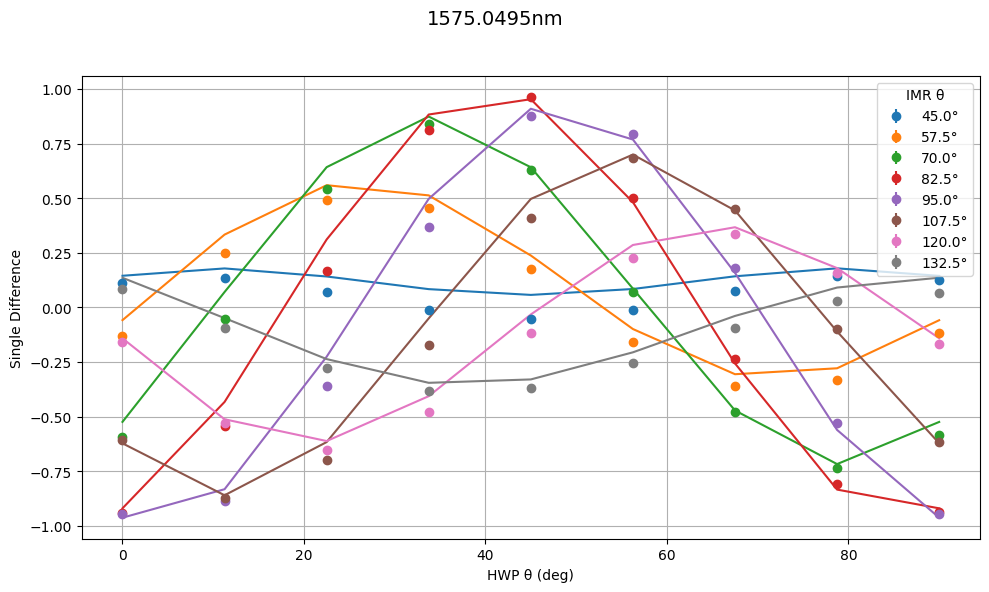

Updated Mueller Matrix:
[[ 0.56782667  0.56661996 -0.00435438  0.03674215]
 [-0.56782667 -0.56661996  0.00435438 -0.03674215]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.14573931595221595 0.03287610464397961
Error: [0.01503942 0.01587336 0.0081937 ]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 2.244e+02  4.430e+02 ...  2.985e+02  4.914e+02]
           x: [ 1.520e+00  2.948e+00  9.952e-01]
        cost: 10088957.017510112
         jac: [[ 8.270e+03 -8.300e+00 -4.180e+02]
               [ 5.848e+03 -3.078e+03  3.125e+02]
               ...
               [ 6.332e+03  3.159e+03 -4.703e+02]
               [ 8.298e+03 -8.497e+00 -4.845e+02]]
        grad: [-1.053e+01 -4.176e+01 -1.286e+00]
  optimality: 12.270948292776165
 active_mask: [0 0 0]
        nfev: 7
        njev: 7
     message: Both `ftol` and `xtol` termination conditions are satisfied.
  

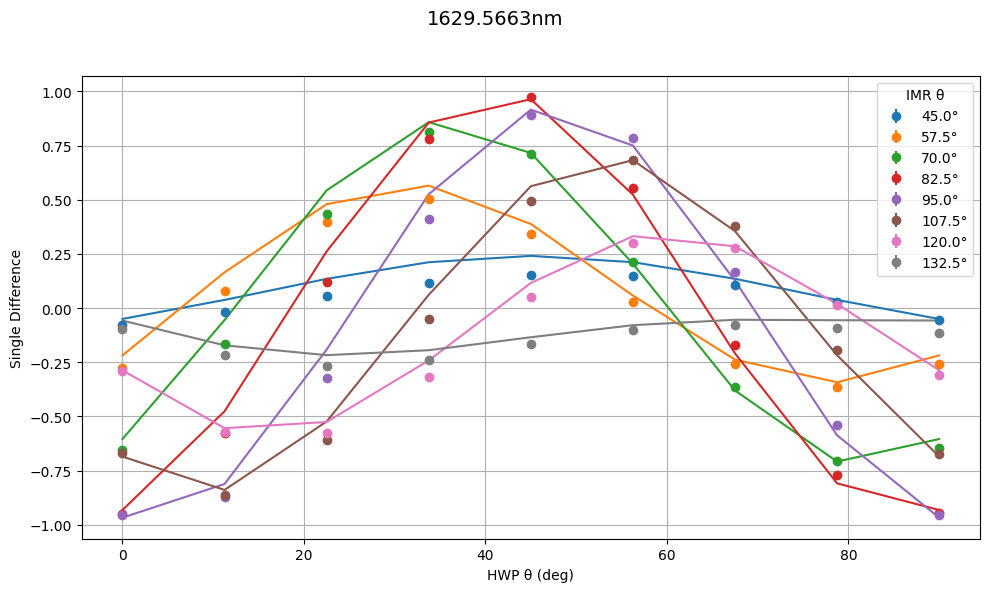

Updated Mueller Matrix:
[[ 0.47134376  0.46880577 -0.00592192  0.04848728]
 [-0.47134376 -0.46880577  0.00592192 -0.04848728]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.13929518639071237 0.0456212971419091
Error: [0.01384    0.01461231 0.00717798]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 2.167e+02  5.468e+02 ...  1.702e+02  4.466e+02]
           x: [ 1.358e+00  2.957e+00  9.944e-01]
        cost: 10622085.712536518
         jac: [[ 8.297e+03 -8.343e+00 -1.798e+03]
               [ 5.873e+03 -3.013e+03 -6.757e+02]
               ...
               [ 6.191e+03  3.169e+03 -1.475e+03]
               [ 8.371e+03 -8.560e+00 -1.881e+03]]
        grad: [-5.952e+00 -2.578e+01 -4.615e-01]
  optimality: 7.4974538823859165
 active_mask: [0 0 0]
        nfev: 7
        njev: 7
     message: Both `ftol` and `xtol` termination conditions are satisfied.
   

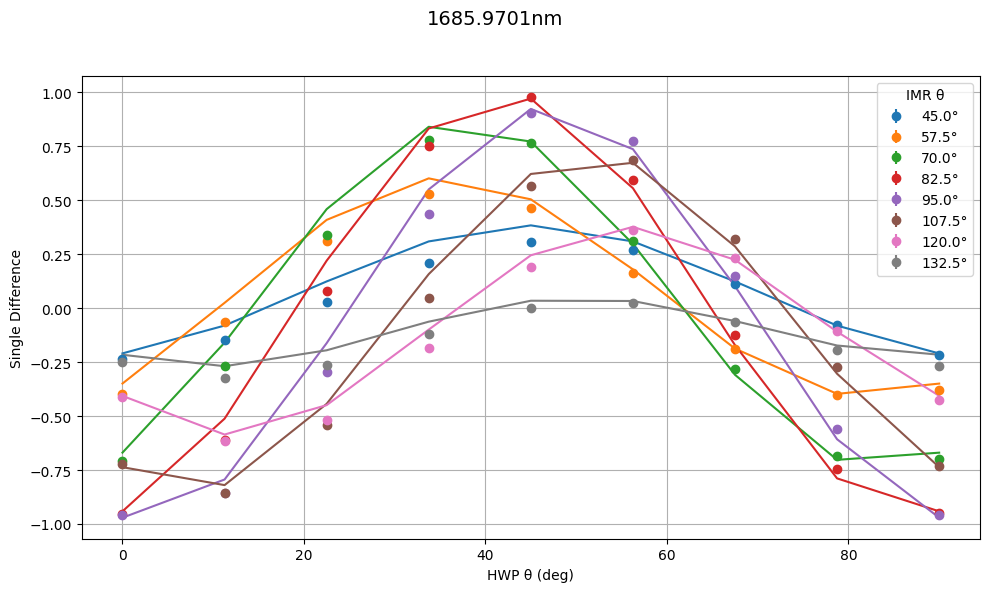

Updated Mueller Matrix:
[[ 0.39225462  0.3888452  -0.00628401  0.05122115]
 [-0.39225462 -0.3888452   0.00628401 -0.05122115]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.14091721733213614 0.048753080799322224
Error: [0.01451033 0.01525953 0.00700826]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 2.341e+02  6.715e+02 ...  7.204e+01  4.221e+02]
           x: [ 1.243e+00  2.969e+00  9.952e-01]
        cost: 13374848.848484505
         jac: [[ 8.624e+03 -8.689e+00 -2.944e+03]
               [ 6.067e+03 -3.067e+03 -1.462e+03]
               ...
               [ 6.250e+03  3.254e+03 -2.253e+03]
               [ 8.715e+03 -8.912e+00 -3.047e+03]]
        grad: [-1.824e+01 -7.782e+01 -4.725e-01]
  optimality: 22.51494670587349
 active_mask: [0 0 0]
        nfev: 7
        njev: 7
     message: `ftol` termination condition is satisfied.
     success: True
 

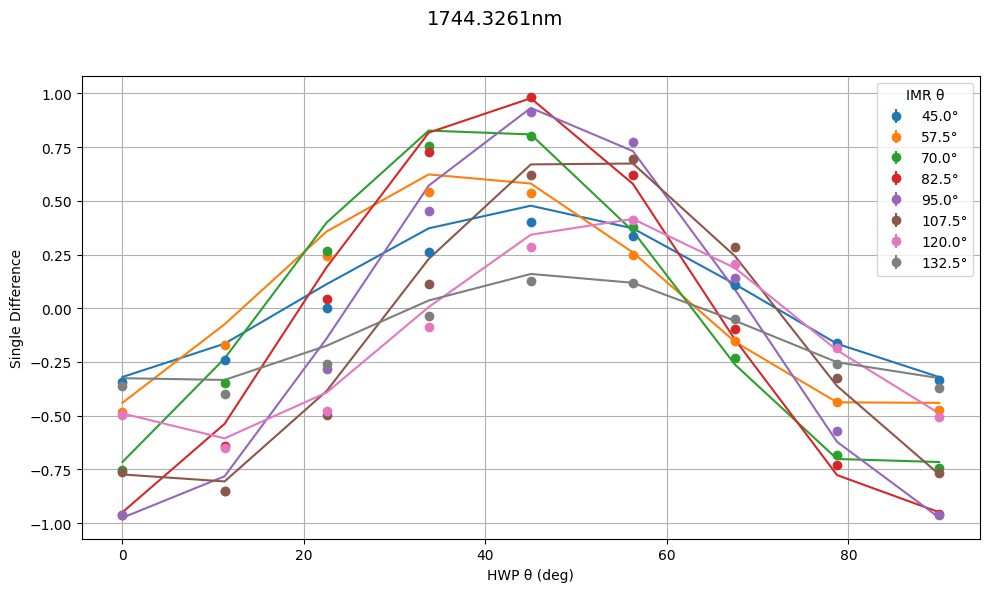

Updated Mueller Matrix:
[[ 0.33731591  0.33411669 -0.0054587   0.04602455]
 [-0.33731591 -0.33411669  0.0054587  -0.04602455]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.14945952414797745 0.05317511160823163
Error: [0.01608447 0.01688011 0.0071944 ]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 5.085e+02  1.315e+03 ...  1.232e+02  7.283e+02]
           x: [ 1.143e+00  2.979e+00  9.942e-01]
        cost: 41172890.63470746
         jac: [[ 1.303e+04 -1.315e+01 -5.970e+03]
               [ 9.050e+03 -4.518e+03 -3.222e+03]
               ...
               [ 9.115e+03  4.813e+03 -4.343e+03]
               [ 1.321e+04 -1.350e+01 -6.164e+03]]
        grad: [-1.544e+02 -7.503e+02 -7.549e-01]
  optimality: 220.43469013834675
 active_mask: [0 0 0]
        nfev: 9
        njev: 9
     message: `ftol` termination condition is satisfied.
     success: True
  

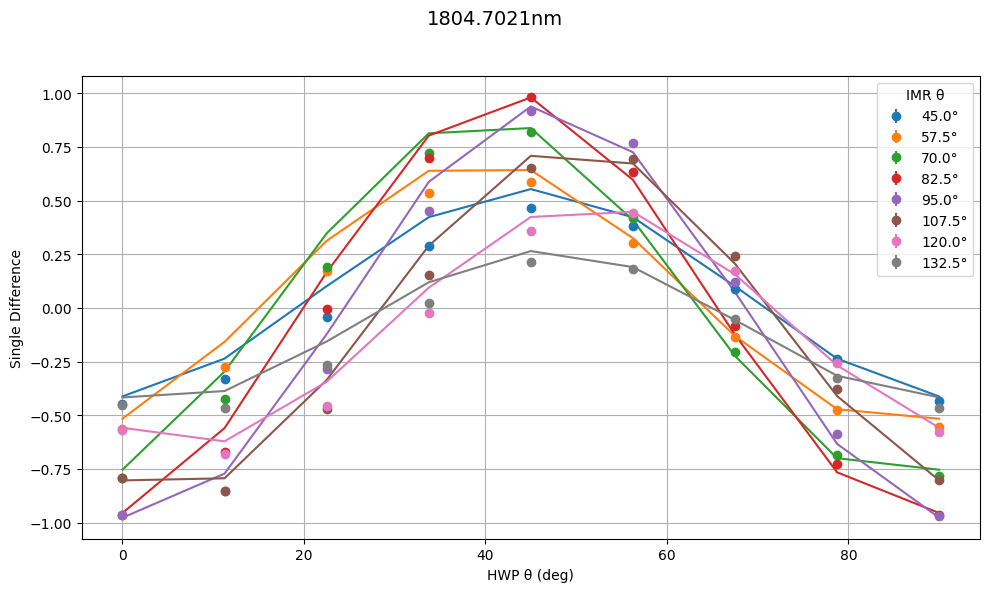

Updated Mueller Matrix:
[[ 0.29170348  0.28756327 -0.00555546  0.04865617]
 [-0.29170348 -0.28756327  0.00555546 -0.04865617]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.17127612391868324 0.04638053980781043
Error: [0.0193743  0.02048338 0.00825659]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 7.228e+00  2.122e+03 ... -9.662e+02  2.532e+02]
           x: [ 1.035e+00  3.005e+00  9.886e-01]
        cost: 181919629.55070832
         jac: [[ 2.830e+04 -2.867e+01 -1.698e+04]
               [ 1.945e+04 -9.696e+03 -9.800e+03]
               ...
               [ 1.921e+04  1.023e+04 -1.167e+04]
               [ 2.861e+04 -2.930e+01 -1.743e+04]]
        grad: [-4.478e+08 -3.739e+02 -1.241e+01]
  optimality: 106.57694152423247
 active_mask: [1 0 0]
        nfev: 8
        njev: 8
     message: Both `ftol` and `xtol` termination conditions are satisfied.
  

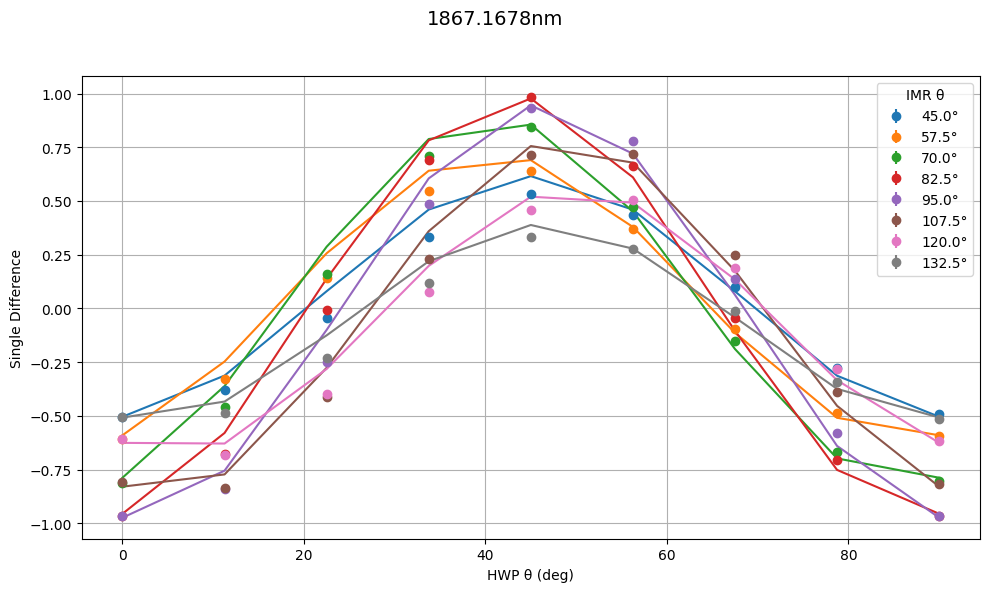

Updated Mueller Matrix:
[[ 0.24596312  0.23730409 -0.00590194  0.06441886]
 [-0.24596312 -0.23730409  0.00590194 -0.06441886]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.15152914727734484 0.07491863174584565
Error: [0.01918722 0.01984333 0.00757257]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [-1.167e+03  4.515e+02 ... -1.851e+03 -1.145e+03]
           x: [ 9.474e-01  3.032e+00  9.796e-01]
        cost: 92828086.61542429
         jac: [[ 1.871e+04 -1.902e+01 -1.373e+04]
               [ 1.276e+04 -6.400e+03 -8.245e+03]
               ...
               [ 1.249e+04  6.655e+03 -9.073e+03]
               [ 1.881e+04 -1.929e+01 -1.399e+04]]
        grad: [-4.761e+08 -1.349e+00  3.816e-01]
  optimality: 0.37835362801682726
 active_mask: [1 0 0]
        nfev: 7
        njev: 7
     message: Both `ftol` and `xtol` termination conditions are satisfied.
  

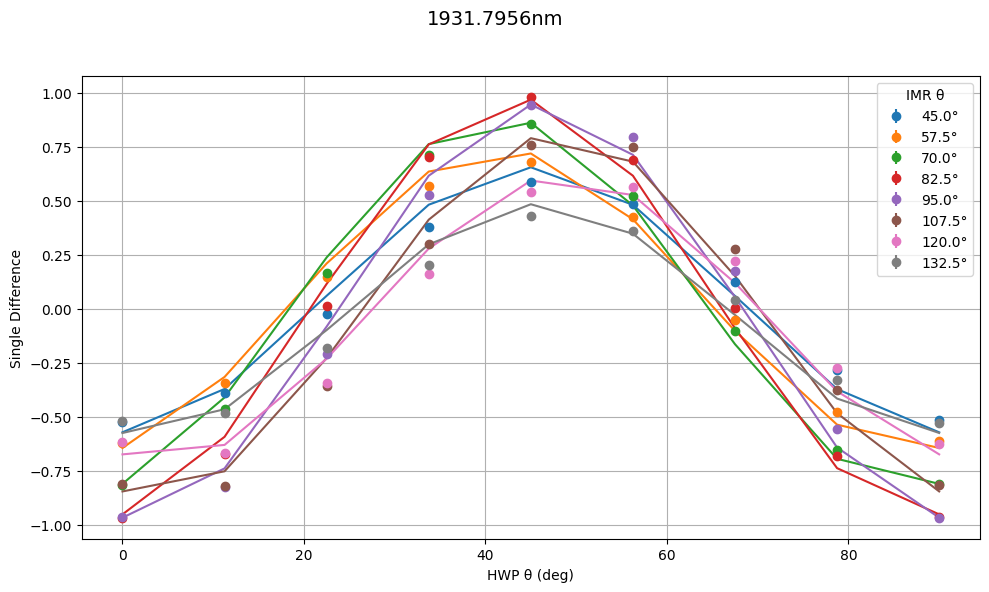

Updated Mueller Matrix:
[[ 0.21251287  0.19633058 -0.00556841  0.08114811]
 [-0.21251287 -0.19633058  0.00556841 -0.08114811]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.13053718660894698 0.12372521724415236
Error: [0.02086059 0.02075579 0.00781065]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [-1.345e+03  3.155e+02 ... -1.884e+03 -1.442e+03]
           x: [ 8.833e-01  3.053e+00  9.746e-01]
        cost: 89690334.01595375
         jac: [[ 1.574e+04 -1.603e+01 -1.326e+04]
               [ 1.064e+04 -5.379e+03 -8.124e+03]
               ...
               [ 1.034e+04  5.481e+03 -8.474e+03]
               [ 1.575e+04 -1.617e+01 -1.343e+04]]
        grad: [-4.795e+08 -3.798e+00 -4.565e+00]
  optimality: 1.0838357694438792
 active_mask: [1 0 0]
        nfev: 7
        njev: 7
     message: Both `ftol` and `xtol` termination conditions are satisfied.
   

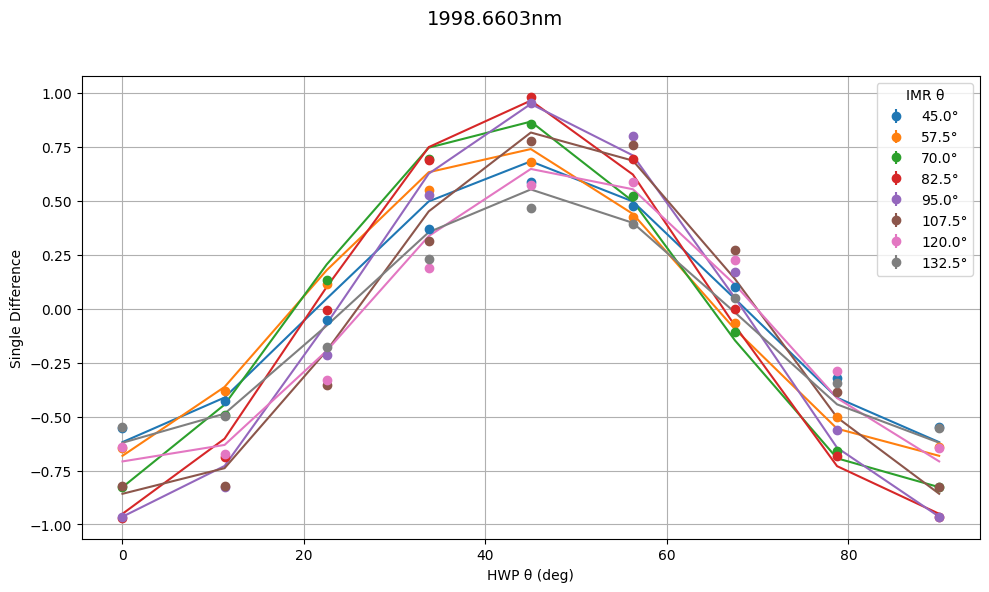

Updated Mueller Matrix:
[[ 0.18943431  0.16861232 -0.00432388  0.08623542]
 [-0.18943431 -0.16861232  0.00432388 -0.08623542]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.15719015603911013 0.13581996223461618
Error: [0.0249489  0.02473307 0.00879199]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [-1.603e+03  8.666e+00 ... -2.142e+03 -1.812e+03]
           x: [ 8.399e-01  3.087e+00  9.660e-01]
        cost: 91181748.98546098
         jac: [[ 1.416e+04 -1.446e+01 -1.314e+04]
               [ 9.460e+03 -4.903e+03 -8.272e+03]
               ...
               [ 9.324e+03  4.848e+03 -8.162e+03]
               [ 1.410e+04 -1.449e+01 -1.324e+04]]
        grad: [-4.835e+08 -1.755e+01 -4.833e+00]
  optimality: 4.960231961312792
 active_mask: [1 0 0]
        nfev: 6
        njev: 6
     message: Both `ftol` and `xtol` termination conditions are satisfied.
    

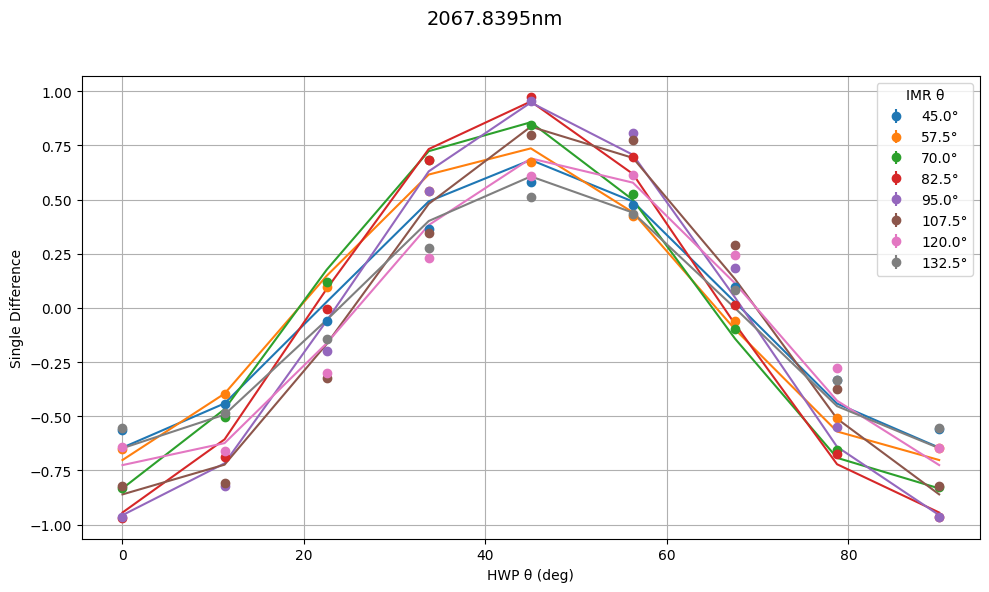

Updated Mueller Matrix:
[[ 0.17636345  0.14798516 -0.00174708  0.09592398]
 [-0.17636345 -0.14798516  0.00174708 -0.09592398]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.1571851849490053 0.15527520991703392
Error: [0.02825078 0.02753539 0.00980317]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [-1.574e+03 -1.316e+02 ... -2.047e+03 -1.852e+03]
           x: [ 8.140e-01  3.128e+00  9.620e-01]
        cost: 78726574.54561055
         jac: [[ 1.225e+04 -1.253e+01 -1.202e+04]
               [ 8.037e+03 -4.313e+03 -7.774e+03]
               ...
               [ 8.136e+03  4.098e+03 -7.236e+03]
               [ 1.214e+04 -1.247e+01 -1.206e+04]]
        grad: [-4.140e+08 -2.369e+00  2.585e-01]
  optimality: 0.6585057864636175
 active_mask: [1 0 0]
        nfev: 6
        njev: 6
     message: Both `ftol` and `xtol` termination conditions are satisfied.
    

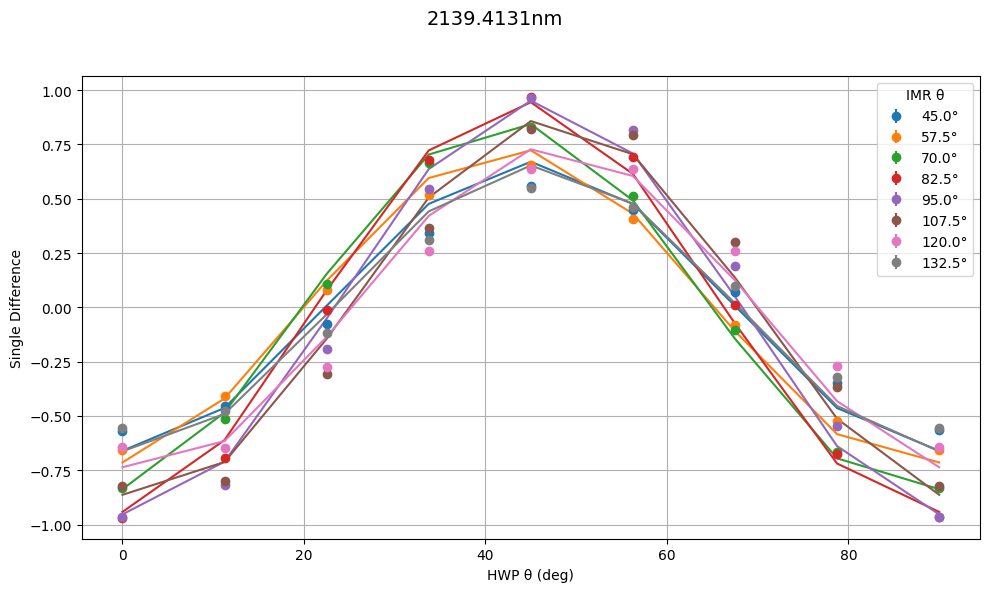

Updated Mueller Matrix:
[[ 0.16859439  0.1365191   0.0021188   0.09890457]
 [-0.16859439 -0.1365191  -0.0021188  -0.09890457]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.1631188226351848 0.1629285492071188
Error: [0.03060866 0.02965185 0.01037999]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [-1.859e+03 -5.990e+02 ... -2.341e+03 -2.184e+03]
           x: [ 8.003e-01  3.168e+00  9.512e-01]
        cost: 75191188.8733806
         jac: [[ 1.056e+04 -1.079e+01 -1.077e+04]
               [ 6.879e+03 -3.823e+03 -7.223e+03]
               ...
               [ 7.239e+03  3.520e+03 -6.428e+03]
               [ 1.043e+04 -1.070e+01 -1.076e+04]]
        grad: [-3.769e+08 -7.592e+01  2.603e-01]
  optimality: 21.23737488027302
 active_mask: [1 0 0]
        nfev: 6
        njev: 6
     message: `ftol` termination condition is satisfied.
     success: True
      

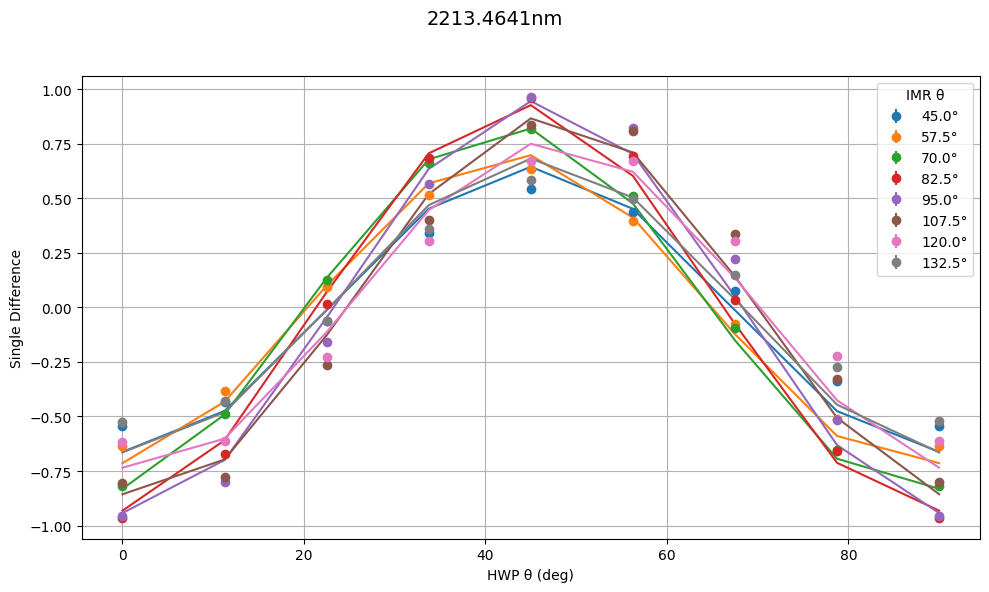

Updated Mueller Matrix:
[[ 0.16761707  0.12618483  0.00669744  0.11012727]
 [-0.16761707 -0.12618483 -0.00669744 -0.11012727]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.13927673110491773 0.20262898153880898
Error: [0.03425173 0.03232437 0.01174582]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [-1.397e+03 -3.336e+02 ... -1.734e+03 -1.718e+03]
           x: [ 8.026e-01  3.227e+00  9.453e-01]
        cost: 52670877.84835866
         jac: [[ 9.168e+03 -9.343e+00 -9.372e+03]
               [ 5.820e+03 -3.400e+03 -6.532e+03]
               ...
               [ 6.412e+03  2.946e+03 -5.353e+03]
               [ 9.048e+03 -9.228e+00 -9.354e+03]]
        grad: [-2.755e+08  3.049e+01  6.168e-01]
  optimality: 11.22479604261285
 active_mask: [1 0 0]
        nfev: 6
        njev: 6
     message: Both `ftol` and `xtol` termination conditions are satisfied.
    

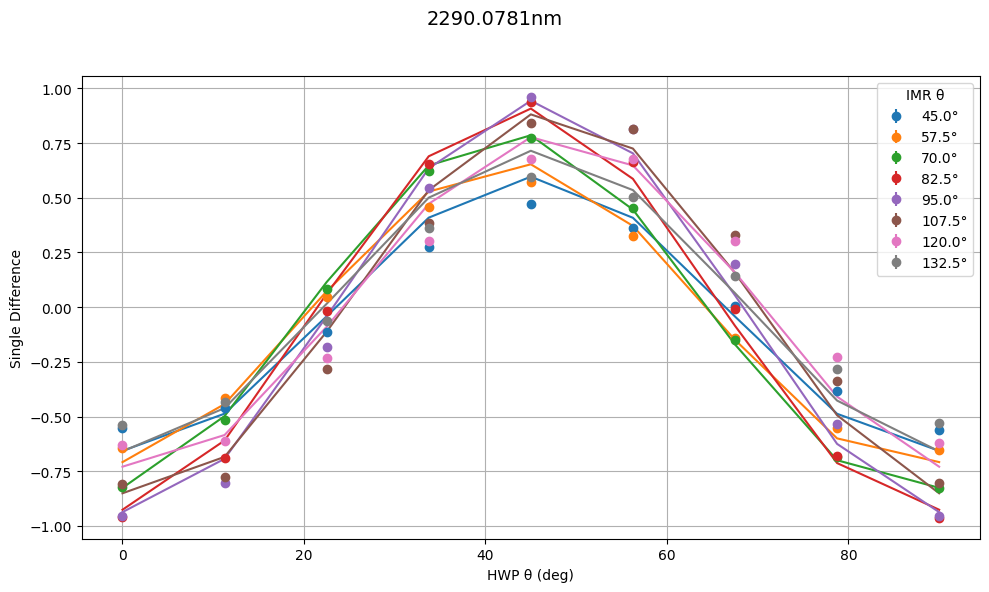

Updated Mueller Matrix:
[[ 0.17044936  0.1240142   0.01408827  0.1160818 ]
 [-0.17044936 -0.1240142  -0.01408827 -0.1160818 ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.1709165991188245 0.17918412883268872
Error: [0.03378732 0.03260386 0.01188561]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [-2.105e+03 -1.269e+03 ... -2.626e+03 -2.413e+03]
           x: [ 8.154e-01  3.244e+00  9.257e-01]
        cost: 74225634.82926139
         jac: [[ 6.907e+03 -7.028e+00 -7.028e+03]
               [ 4.487e+03 -2.650e+03 -5.102e+03]
               ...
               [ 5.163e+03  2.338e+03 -4.207e+03]
               [ 6.801e+03 -6.921e+00 -7.000e+03]]
        grad: [-2.220e+08 -5.150e+03 -9.310e-01]
  optimality: 1566.0657193544828
 active_mask: [1 0 0]
        nfev: 7
        njev: 7
     message: `ftol` termination condition is satisfied.
     success: True
   

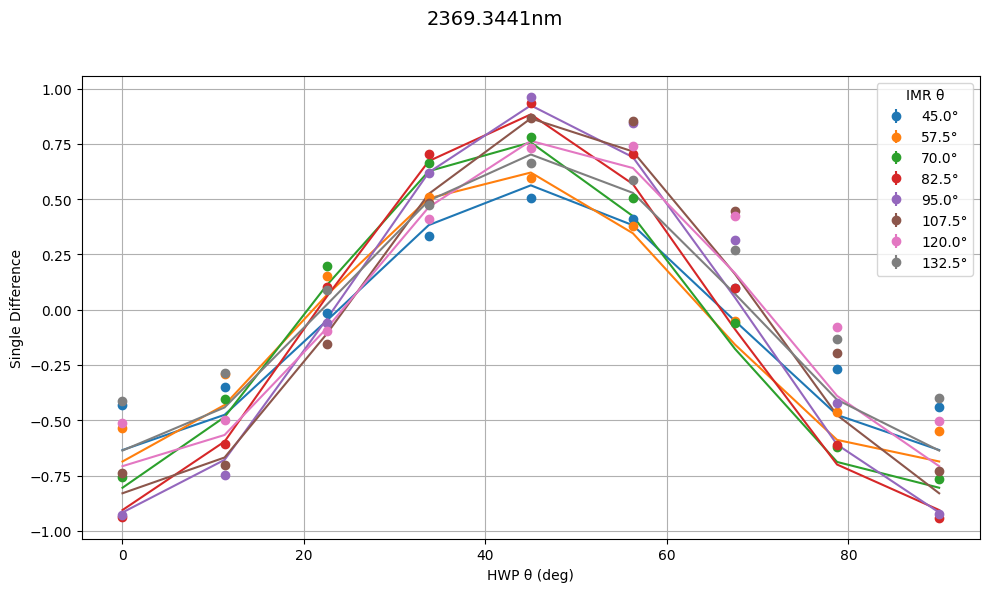

Updated Mueller Matrix:
[[ 0.18151361  0.11881495  0.018914    0.13591343]
 [-0.18151361 -0.11881495 -0.018914   -0.13591343]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.06789431379246791 0.312277138194172
Error: [0.04927411 0.04374275 0.0184309 ]


In [7]:
# Fit all 22 wavelength bins
errors = []
for bin in range(0,22):
    error = fit_CHARIS_Mueller_matrix_by_bin(
        Path(f'/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff/charis_cube_info_bin{bin}_no_pickoff.csv'),
        bin,
        Path(f'/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/system_dicts_no_pickoff_cal/sysdictbin{bin}nopick.json'),
        plot_path=Path(f'/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/model_plots_no_pickoff_cal/bin{bin}nopick.png')
    )
    errors.append(error)


In [2]:
# Now let's make a dataframe of our data, this model data function can be changed easily to include
# whatever parameters you're fitting
json_dir = '/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/system_dicts_no_pickoff_cal'
df = model_data(json_dir)
df

wavelength_bin  hwp_retardance  imr_retardance  \
0        1159.5614        3.028721        4.364416   
1        1199.6971        3.033252        4.083886   
2        1241.2219        3.043981        3.871354   
3        1284.1840        3.077660        3.629883   
4        1328.6331        3.196757        3.442894   
5        1374.6208        2.964468        2.706625   
6        1422.2002        2.940792        2.440451   
7        1471.4264        2.938076        2.170875   
8        1522.3565        2.936652        1.926266   
9        1575.0495        2.939345        1.715997   
10       1629.5663        2.947578        1.520342   
11       1685.9701        2.957412        1.358428   
12       1744.3261        2.969136        1.243106   
13       1804.7021        2.978519        1.143234   
14       1867.1678        3.005013        1.035290   
15       1931.7956        3.031575        0.947384   
16       1998.6603        3.053061        0.883334   
17       2067.8395        3.086868        0.839936   
18       2139.4131        3.127714        0.814041   
19       2213.4641        3.167507        0.800300   
20       2290.0781        3.227315        0.802597   
21       2369.3441        3.243914        0.815376   

    calibration_polarizer_diattenuation  
0                              1.000000  
1                              0.996928  
2                              1.000000  
3                              0.995585  
4                              0.993084  
5                              0.996822  
6                              0.999460  
7                              0.997759  
8                              0.996491  
9                              0.997217  
10                             0.995212  
11                             0.994407  
12                             0.995187  
13                             0.994173  
14                             0.988569  
15                             0.979613  
16                             0.974572  
17                             0.966017  
18                             0.962015  
19                             0.951215  
20                             0.945264  
21                             0.925692

# Step 5: Refine Model

This step depends heavily on what components you are fitting to. I'm going to make the IMR and HWP retardances a function of wavelength using the Joost t Hart 2021 physical models. I'll use the parameters we just fitted as my dataset. 

In [39]:
def phys_model_chisq(p0, wavelengths, retardances_hwp, errors_hwp, retardances_imr,errors_imr):
    """
    Calculate the chi squared for the physical model of CHARIS.
    
    Parameters:
    -----------
    p0 : list
        List of parameters [w_sio2, w_mgf2, d].
    
    wavelengths : numpy array
        Array of wavelengths that are in the data.

    retardances_hwp : list or numpy array
        Retardances of the HWP at the specified wavelengths.

    errors_hwp : list or numpy array
        Errors associated with the HWP retardances.

    retardances_imr : list or numpy array
        Retardances of the IMR at the specified wavelengths.
    
    errors_imr : list or numpy array
        Errors associated with the IMR retardances.
    
    Returns:
    --------
    float
        The chi squared value.
    """
    # Get model retardances
    model_hwp = HWP_retardance(wavelengths, p0[0], p0[1])
    model_imr = IMR_retardance(wavelengths, p0[2])
    # Calculate residuals
    residuals_hwp = (retardances_hwp - model_hwp) / errors_hwp
    residuals_imr = (retardances_imr - model_imr) / errors_imr
    # Calculate log-likelihood
    logl_hwp = np.sum(residuals_hwp**2)
    logl_imr = np.sum(residuals_imr**2)
    return logl_hwp + logl_imr

In [44]:

# Minimizing the physical model

p0 = [1.623, 1.268, 262.56] # starting guesses from Joost t Hart 2021
wavelengths = wavelength_bins # CHARIS wavelength bins

# Defining reasonable bounds (these values shouldn't have changed much)

wsio2_bounds = (0.9*p0[0], 1.1*p0[0])
wmgf2_bounds = (0.9*p0[1], 1.1*p0[1])
d_bounds = (0.9*p0[2], 1.1*p0[2])
bounds = [wsio2_bounds, wmgf2_bounds, d_bounds]

# Extract our retardances and errors from the data
errors = np.array(errors)
hwp_retardances = df['hwp_retardance'].values
imr_retardance = df['imr_retardance'].values
hwp_errors = errors[:,0] 
imr_errors = errors[:,1]  

# Use a while loop to iteratively minimize the chi squared function
# Counters for iterative fitting

iteration = 1
previous_chisq = 1000000
new_chisq = 0

while abs(previous_chisq-new_chisq)> 0.01*abs(previous_chisq):
        previous_chisq = new_chisq
        result = minimize(phys_model_chisq,p0, args=(wavelengths, hwp_retardances, hwp_errors, imr_retardance, imr_errors), bounds=bounds)
        p0 = result.x
        new_chisq = result.fun
        iteration += 1
        print(result)




  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 402.31145087712866
        x: [ 1.617e+00  1.264e+00  2.597e+02]
      nit: 6
      jac: [-1.161e-02  9.754e-02  1.577e-02]
     nfev: 144
     njev: 36
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
  message: ABNORMAL_TERMINATION_IN_LNSRCH
  success: False
   status: 2
      fun: 402.3114508771288
        x: [ 1.617e+00  1.264e+00  2.597e+02]
      nit: 0
      jac: [-1.161e-02  9.754e-02  1.577e-02]
     nfev: 52
     njev: 13
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>


That's It! The fit is updated. However, in the Hart 2021 paper, a degeneracy in wavelength bin 4 was noted. Because of this, I will redo the fit to see if the model fits better. 

In [41]:
# Redo the fit without the degenerate point (bin 4)

wavelengths2 = np.delete(wavelength_bins, 4)
p0_2 = [1.623, 1.268, 262.56] # starting guesses from Joost t Hart 2021

# Defining reasonable bounds (these values shouldn't have changed much)

wsio2_bounds2 = (0.9*p0_2[0], 1.1*p0_2[0])
wmgf2_bounds2 = (0.9*p0_2[1], 1.1*p0_2[1])
d_bounds2 = (0.9*p0_2[2], 1.1*p0_2[2])
bounds2 = [wsio2_bounds2, wmgf2_bounds2, d_bounds2]

# Extract our retardances and errors from the data
errors2 = np.delete(np.array(errors), 4, axis=0)
hwp_retardances2 = df['hwp_retardance'].values
imr_retardance2 = df['imr_retardance'].values
hwp_errors2 = errors2[:,0] 
imr_errors2 = errors2[:,1]  

# Remove the corresponding retardances for the removed bin

hwp_retardances2 = np.delete(hwp_retardances2, 4)
imr_retardance2= np.delete(imr_retardance2,4)

# Use a while loop to iteratively minimize the chi squared function

# Counters for iterative fitting

iteration2 = 1
previous_logl2 = 1000000
new_logl2 = 0

while abs(previous_logl2-new_logl2)> 0.01*abs(previous_logl2):
        previous_logl2 = new_logl2
        result2 = minimize(phys_model_chisq,p0_2, args=(wavelengths2, hwp_retardances2, hwp_errors2, imr_retardance2, imr_errors2), bounds=bounds2)
        p0_2 = result2.x
        new_logl2 = result2.fun
        iteration2 += 1
        print(result2)






  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 367.86512076633227
        x: [ 1.622e+00  1.268e+00  2.595e+02]
      nit: 10
      jac: [ 5.060e-01 -6.508e-01 -9.265e-04]
     nfev: 112
     njev: 28
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 367.8651207645853
        x: [ 1.622e+00  1.268e+00  2.595e+02]
      nit: 1
      jac: [ 1.247e-02  1.565e-02 -1.239e-03]
     nfev: 12
     njev: 3
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>


In [42]:
# Compare chi sq of all models

p0_Hart = [1.623, 1.268, 262.56]

# Hart chi sq

print("Hart:",phys_model_chisq(p0_Hart,wavelengths, hwp_retardances,hwp_errors,imr_retardance,imr_errors))

# Our model with all bins

print("Our model with all bins:",phys_model_chisq(result.x,wavelengths, hwp_retardances,hwp_errors,imr_retardance,imr_errors))

# Our model without bin 4

print("Our model without bin 4:",phys_model_chisq(result2.x,wavelengths2, hwp_retardances2,hwp_errors2,imr_retardance2,imr_errors2))



Hart: 592.6091766905188
Our model with all bins: 402.31145087712866
Our model without bin 4: 367.8651207645853
